#                       Various CNN networks on MNIST dataset

In [1]:
# To ignore warnings in the below code

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

## 1. Model 1: CNN with 3 ConvNets and with kernel size 3x3

In [7]:
# MODEL 1
model1 = Sequential()

#convnet 1
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

#convnet 2
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(Dropout(0.25))

#convnet 3
model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())

#hidden layer
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model1.summary())
history = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 15488)             0         
________

Test loss: 0.0212051354131494
Test accuracy: 0.9938


<IPython.core.display.Javascript object>


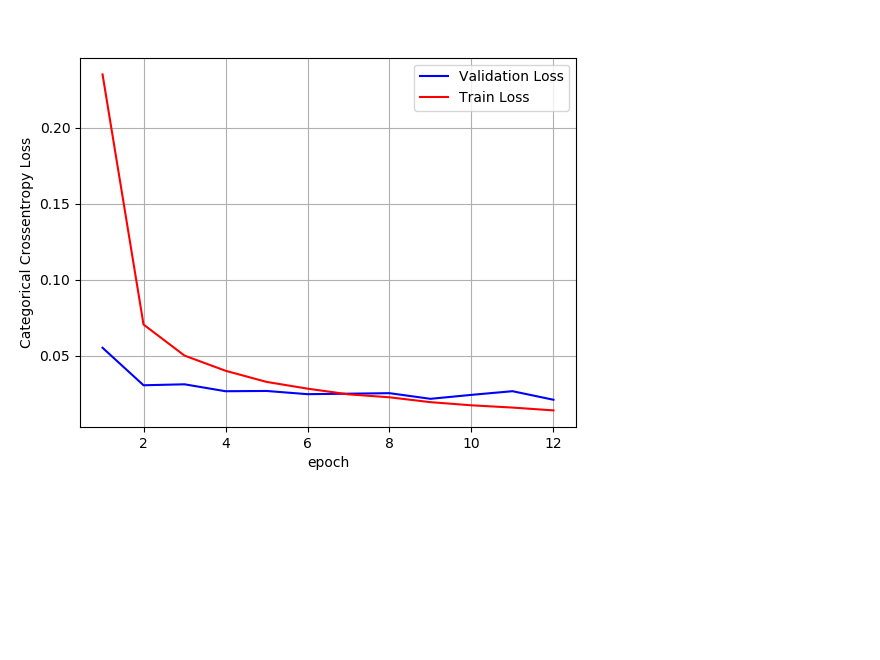

In [8]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x=list(range(1,epochs+1))
vy=history.history['val_loss'] #validation loss
ty=history.history['loss'] # train loss
plt_dynamic(x, vy, ty, ax)

## 2. Model 2: CNN with 5 ConvNets and with kernel size 5x5

In [16]:
# MODEL 1
model2 = Sequential()

#convnet 1
model2.add(Conv2D(32, kernel_size=(5, 5), padding = 'same', activation='relu', input_shape=input_shape))

#convnet 2
model2.add(Conv2D(64, kernel_size=(5, 5), padding = 'same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())

#convnet 3
model2.add(Conv2D(96, kernel_size=(5, 5), padding = 'same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#convnet 4
model2.add(Conv2D(108, kernel_size=(5, 5), padding = 'same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
#model2.add(Dropout(0.25))

#convnet 5
model2.add(Conv2D(164, kernel_size=(5, 5), padding = 'same', activation='relu'))
model2.add(Dropout(0.15))
model2.add(Flatten())

#hidden layer
model2.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model2.summary())

history = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 14, 14, 96)        153696    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 7, 7, 96)          0         
__________

Test loss: 0.023452779674043495
Test accuracy: 0.9932


<IPython.core.display.Javascript object>


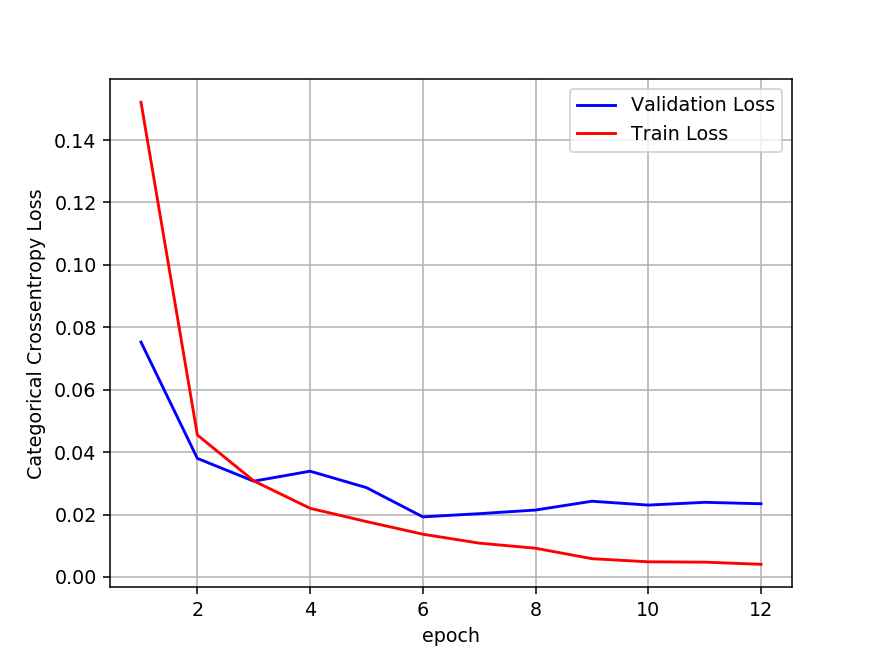

In [17]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x=list(range(1,epochs+1))
vy=history.history['val_loss'] #validation loss
ty=history.history['loss'] # train loss
plt_dynamic(x, vy, ty, ax)

## 3. Model 3: CNN with 7 ConvNets and with kernel size 7x7

In [26]:
# MODEL 1
model3 = Sequential()
#convnet 1
model3.add(Conv2D(32, kernel_size=(7, 7), padding = 'same', activation='relu', input_shape=input_shape))

#convnet 2
model3.add(Conv2D(64, kernel_size=(7, 7), strides = (1, 1), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

#convnet 3
model3.add(Conv2D(96, kernel_size=(7, 7), padding = 'same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))

#convnet 4
model3.add(Conv2D(108, kernel_size=(7, 7), padding = 'same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

#convnet 5
model3.add(Conv2D(124, kernel_size=(7, 7), padding = 'same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
#model3.add(Flatten())

#convnet 6
model3.add(Conv2D(162, kernel_size=(7, 7), padding = 'same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.4))
#model3.add(Flatten())

#convnet 7
model3.add(Conv2D(198, kernel_size=(7, 7), padding = 'same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())

#hidden layer
model3.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

#hidden layer
model3.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
print(model3.summary())

history = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 28, 28, 32)        1600      
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 22, 22, 64)        100416    
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 11, 11, 96)        301152    
_________________________________________________________________
batch_normalization_21 (Batc (None, 11, 11, 96)        384       
_________________________________________________________________
dropout_41 (Dropout)         (None, 11, 11, 96)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 11, 11, 108)       508140    
__________

Test loss: 0.08595889861029572
Test accuracy: 0.9743


<IPython.core.display.Javascript object>


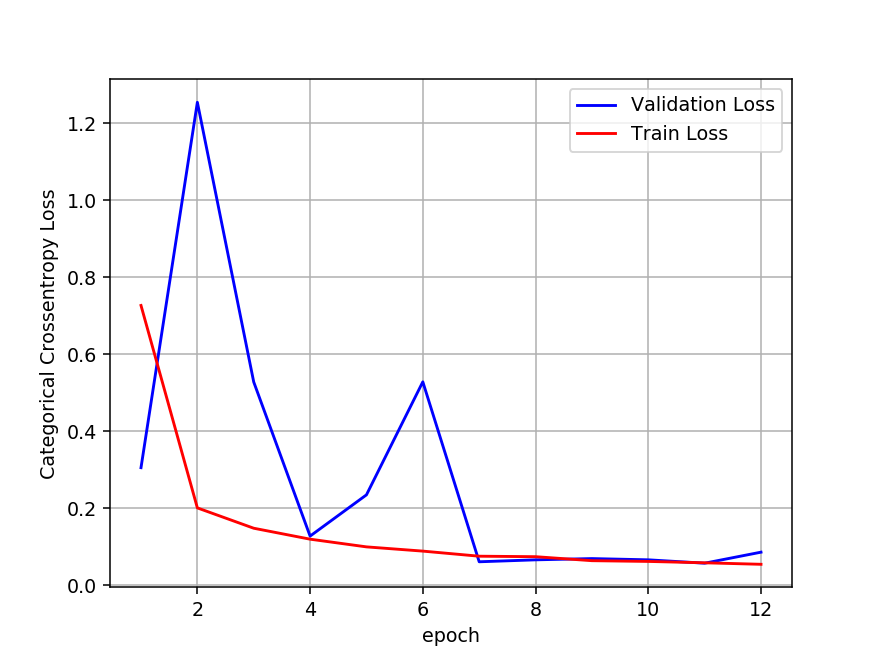

In [27]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x=list(range(1,epochs+1))
vy=history.history['val_loss'] #validation loss
ty=history.history['loss'] # train loss
plt_dynamic(x, vy, ty, ax)

## 4. Conclusion

In [28]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Index", "Model Name", "Accuracy"]
x.add_row(["1", '3 CNN with kernel 3x3', 0.9938])
x.add_row(["2", '5 CNN with kernel 5x5', 0.9932])
x.add_row(["3", '7 CNN with kernel 7x7', 0.9743])

print(x)

+-------+-----------------------+----------+
| Index |       Model Name      | Accuracy |
+-------+-----------------------+----------+
|   1   | 3 CNN with kernel 3x3 |  0.9938  |
|   2   | 5 CNN with kernel 5x5 |  0.9932  |
|   3   | 7 CNN with kernel 7x7 |  0.9743  |
+-------+-----------------------+----------+
